In [1]:
import geopandas as gpd
import shapely
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [2]:
provinces_gdf = gpd.read_file('osmconvert/adm_boundary/IDN_adm1.shp')

In [4]:
#fragility curve of flood events
flood_depth = [0, 25, 50, 75, 100, 125, 150, 175, 200]
flood_dmg = [0, 0.025, 0.075, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7]

#fragility curve of earthquakes
pga_magnitude = [0, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600]
pga_dmg = [0, 0.05, 0.15, 0.22, 0.45, 0.65, 0.8, 0.85, 0.9, 0.95]

#converting severity of damage to monetary costs
dmg_severity = [0, 0.3, 0.6, 0.9]
dmg_usd = [0, 2000, 4000, 20000]

In [5]:
road_100yr_gdf = gpd.read_file('osmconvert/hazard_intersect/road_flood_100yr.shp')
road_100yr_gdf['dmg_ratio'] = np.interp(road_100yr_gdf['val_flood_']/10, flood_depth, flood_dmg) 
road_100yr_gdf['dmg_usd'] = np.interp(road_100yr_gdf['dmg_ratio'], dmg_severity, dmg_usd) 
road_100yr_gdf['dmg_usd'] = road_100yr_gdf['dmg_usd'] * road_100yr_gdf['length_flo']
road_100yr_gdf['dmg_usd'] = np.where(road_100yr_gdf['road_type']=='primary', road_100yr_gdf['dmg_usd']*2, road_100yr_gdf['dmg_usd'])
road_100yr_gdf['dmg_idr'] = road_100yr_gdf['dmg_usd']*14000

In [6]:
road_1000yr_gdf = gpd.read_file('osmconvert/hazard_intersect/road_flood_1000yr.shp')
road_1000yr_gdf['dmg_ratio'] = np.interp(road_1000yr_gdf['val_flood_']/10, flood_depth, flood_dmg) 
road_1000yr_gdf['dmg_usd'] = np.interp(road_1000yr_gdf['dmg_ratio'], dmg_severity, dmg_usd) 
road_1000yr_gdf['dmg_usd'] = road_1000yr_gdf['dmg_usd'] * road_1000yr_gdf['length_flo']
road_1000yr_gdf['dmg_usd'] = np.where(road_1000yr_gdf['road_type']=='primary', road_1000yr_gdf['dmg_usd']*2, road_1000yr_gdf['dmg_usd'])
road_1000yr_gdf['dmg_idr'] = road_1000yr_gdf['dmg_usd']*14000

In [7]:
road_250yr_gdf = gpd.read_file('osmconvert/hazard_intersect/road_pga_250yr.shp')
road_250yr_gdf['dmg_ratio'] = np.interp(road_250yr_gdf['val_pga_25'], pga_magnitude, pga_dmg) 
road_250yr_gdf['dmg_usd'] = np.interp(road_250yr_gdf['dmg_ratio'], dmg_severity, dmg_usd) 
road_250yr_gdf['dmg_usd'] = road_250yr_gdf['dmg_usd'] * road_250yr_gdf['length_pga']
road_250yr_gdf['dmg_usd'] = np.where(road_250yr_gdf['road_type']=='primary', road_250yr_gdf['dmg_usd']*2, road_250yr_gdf['dmg_usd'])
road_250yr_gdf['dmg_idr'] = road_250yr_gdf['dmg_usd']*14000

In [8]:
road_2475yr_gdf = gpd.read_file('osmconvert/hazard_intersect/road_pga_2475yr.shp')
road_2475yr_gdf['dmg_ratio'] = np.interp(road_2475yr_gdf['val_pga_24'], pga_magnitude, pga_dmg) 
road_2475yr_gdf['dmg_usd'] = np.interp(road_2475yr_gdf['dmg_ratio'], dmg_severity, dmg_usd) 
road_2475yr_gdf['dmg_usd'] = road_2475yr_gdf['dmg_usd'] * road_2475yr_gdf['length_pga']
road_2475yr_gdf['dmg_usd'] = np.where(road_2475yr_gdf['road_type']=='primary', road_2475yr_gdf['dmg_usd']*2, road_2475yr_gdf['dmg_usd'])
road_2475yr_gdf['dmg_idr'] = road_2475yr_gdf['dmg_usd']*14000

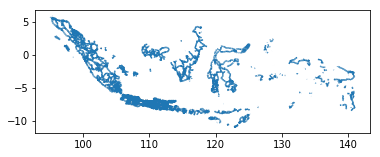

In [9]:
road_2475yr_gdf.plot()

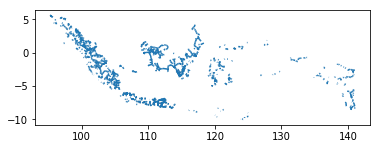

In [10]:
road_1000yr_gdf.plot()

### Aggregate at a province level

In [11]:
hazards = [road_100yr_gdf, road_1000yr_gdf, road_250yr_gdf, road_2475yr_gdf]
hazard_name = ['road_100yr_gdf', 'road_1000yr_gdf', 'road_250yr_gdf', 'road_2475yr_gdf']

dmg_flood_100yr = []
dmg_flood_1000yr = []
dmg_pga_250yr = []
dmg_pga_2475yr = []

all_dmg = [dmg_flood_100yr, dmg_flood_1000yr, dmg_pga_250yr, dmg_pga_2475yr]

for h, hazard in enumerate(hazards):
    for i in range(len(provinces_gdf)):
        print(provinces_gdf.iloc[i]['NAME_1'], hazard_name[h])
        area = provinces_gdf.iloc[i]['geometry']
        road_subset = hazard.loc[hazard['geometry'].within(area)]
        
        dmg =  np.sum(road_subset['dmg_idr'])
        
        all_dmg[h].append(dmg)

Aceh road_100yr_gdf
Bali road_100yr_gdf
Bangka-Belitung road_100yr_gdf
Banten road_100yr_gdf
Bengkulu road_100yr_gdf
Gorontalo road_100yr_gdf
Irian Jaya Barat road_100yr_gdf
Jakarta Raya road_100yr_gdf
Jambi road_100yr_gdf
Jawa Barat road_100yr_gdf
Jawa Tengah road_100yr_gdf
Jawa Timur road_100yr_gdf
Kalimantan Barat road_100yr_gdf
Kalimantan Selatan road_100yr_gdf
Kalimantan Tengah road_100yr_gdf
Kalimantan Timur road_100yr_gdf
Kalimantan Utara road_100yr_gdf
Kepulauan Riau road_100yr_gdf
Lampung road_100yr_gdf
Maluku Utara road_100yr_gdf
Maluku road_100yr_gdf
Nusa Tenggara Barat road_100yr_gdf
Nusa Tenggara Timur road_100yr_gdf
Papua road_100yr_gdf
Riau road_100yr_gdf
Sulawesi Barat road_100yr_gdf
Sulawesi Selatan road_100yr_gdf
Sulawesi Tengah road_100yr_gdf
Sulawesi Tenggara road_100yr_gdf
Sulawesi Utara road_100yr_gdf
Sumatera Barat road_100yr_gdf
Sumatera Selatan road_100yr_gdf
Sumatera Utara road_100yr_gdf
Yogyakarta road_100yr_gdf
Aceh road_1000yr_gdf
Bali road_1000yr_gdf
Bangk

In [13]:
provinces_gdf['dmg_idr_flood100'] = all_dmg[0]
provinces_gdf['dmg_idr_flood1000'] = all_dmg[1]
provinces_gdf['dmg_idr_pga250'] = all_dmg[2]
provinces_gdf['dmg_idr_pga2475'] = all_dmg[3]

In [18]:
provinces_gdf['dmg_idr_flood100'] = provinces_gdf['dmg_idr_flood100']/1e9
provinces_gdf['dmg_idr_flood1000'] = provinces_gdf['dmg_idr_flood1000']/1e9
provinces_gdf['dmg_idr_pga250'] = provinces_gdf['dmg_idr_pga250']/1e9
provinces_gdf['dmg_idr_pga2475'] = provinces_gdf['dmg_idr_pga2475']/1e9

In [19]:
provinces_gdf['dmg_total'] = provinces_gdf['dmg_idr_flood100'] + provinces_gdf['dmg_idr_flood1000']+\
provinces_gdf['dmg_idr_pga250']+provinces_gdf['dmg_idr_pga2475']

Total damage (billion IDR)


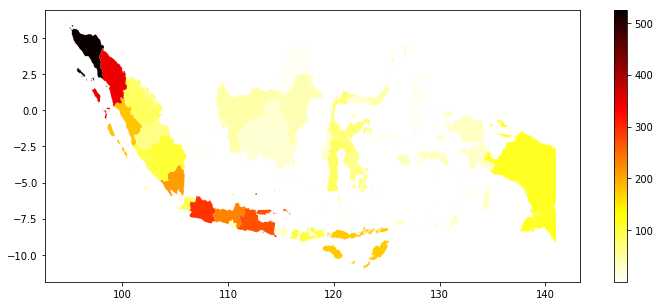

In [33]:
print('Total damage (billion IDR)')
fig, ax = plt.subplots(1, 1, figsize=(12,5))

provinces_gdf.plot(column='dmg_total', cmap='hot_r', legend=True,ax=ax)
plt.show()

Damage from 100-yr flood event (billion IDR)


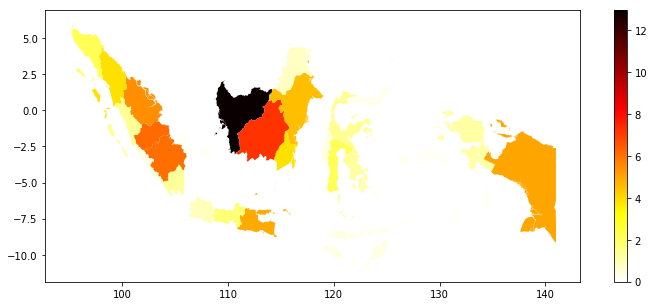

In [34]:
print('Damage from 100-yr flood event (billion IDR)')
fig, ax = plt.subplots(1, 1, figsize=(12,5))

provinces_gdf.plot(column='dmg_idr_flood100', cmap='hot_r', legend=True,ax=ax)
plt.show()

Damage from 1000-yr flood event (billion IDR)


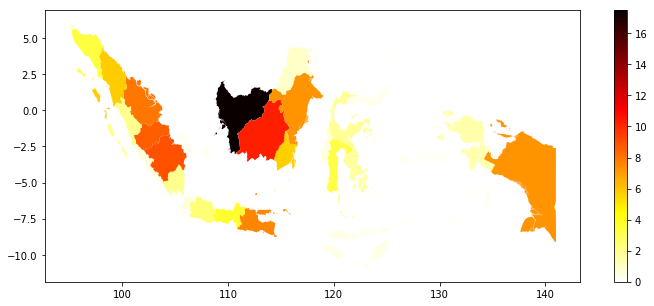

In [35]:
print('Damage from 1000-yr flood event (billion IDR)')
fig, ax = plt.subplots(1, 1, figsize=(12,5))

provinces_gdf.plot(column='dmg_idr_flood1000', cmap='hot_r', legend=True,ax=ax)
plt.show()

Damage from 250-yr earthquake event (billion IDR)


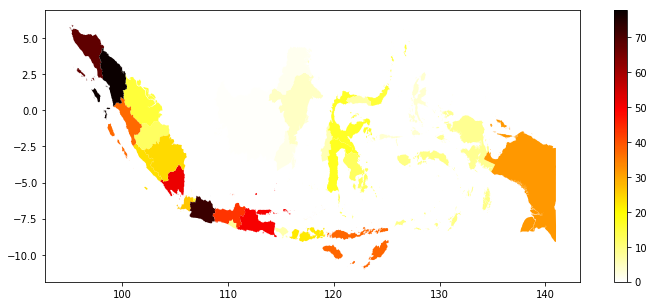

In [36]:
print('Damage from 250-yr earthquake event (billion IDR)')
fig, ax = plt.subplots(1, 1, figsize=(12,5))

provinces_gdf.plot(column='dmg_idr_pga250', cmap='hot_r', legend=True,ax=ax)
plt.show()

Damage from 2475-yr earthquake event (billion IDR)


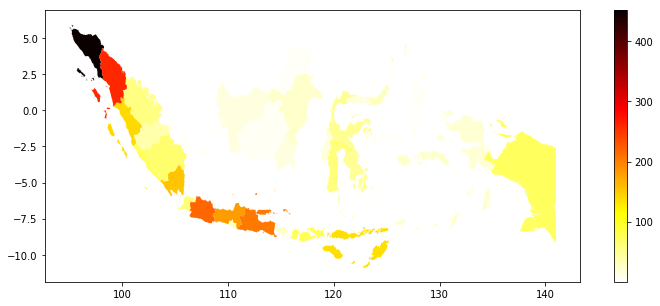

In [37]:
print('Damage from 2475-yr earthquake event (billion IDR)')
fig, ax = plt.subplots(1, 1, figsize=(12,5))

provinces_gdf.plot(column='dmg_idr_pga2475', cmap='hot_r', legend=True,ax=ax)
plt.show()

In [29]:
provinces_gdf.to_file('osmconvert/adm_boundary/IDN_adm1_v02.shp')

In [30]:
output = provinces_gdf.drop(['geometry'],axis=1)

In [31]:
output = pd.DataFrame(output)

In [32]:
output.to_csv('analysis_v02.csv')